In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df_loans=pd.read_csv(r"C:\Users\ankit\Python Project\NBFC Credit Risk assesment project\loans.csv")
df_customers=pd.read_csv(r"C:\Users\ankit\Python Project\NBFC Credit Risk assesment project\customers.csv")
df_bureau=pd.read_csv(r"C:\Users\ankit\Python Project\NBFC Credit Risk assesment project\bureau_data.csv")

In [3]:
df_loans.head(2)

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False


In [4]:
df_customers.head(2)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001


In [5]:
df_bureau.head(2)


,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4


In [6]:
df_merge1=pd.merge(df_customers,df_loans,on='cust_id')

In [7]:
df=pd.merge(df_merge1,df_bureau,on='cust_id')
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,2019-07-24,2019-08-09,False,3,0,115,15,87,5,26
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,2019-07-24,2019-08-02,False,4,2,120,0,0,5,10


In [8]:
df.default.value_counts()

default
False    45703
True      4297
Name: count, dtype: int64

In [9]:
df.default=df.default.astype(int)

In [10]:
df

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,0,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,0,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,0,2,1,82,24,147,6,58
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,2019-07-24,2019-08-09,0,3,0,115,15,87,5,26
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,2019-07-24,2019-08-02,0,4,2,120,0,0,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,C49996,40,F,Single,Salaried,775000,2,Owned,11,Chennai,...,2024-07-22,2024-08-15,0,4,2,165,1,6,8,24
49996,C49997,39,M,Single,Salaried,3117000,0,Owned,9,Kolkata,...,2024-07-22,2024-07-29,0,4,0,161,0,0,4,91
49997,C49998,45,F,Single,Self-Employed,1329000,0,Rented,27,Bangalore,...,2024-07-22,2024-07-25,0,4,1,42,0,0,7,38
49998,C49999,42,F,Single,Self-Employed,533000,2,Mortgage,20,Hyderabad,...,2024-07-22,2024-07-29,0,1,2,42,9,47,4,17


In [11]:
X=df.drop('default',axis=1)

In [12]:
y=df["default"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [13]:
df_train=pd.concat([X_train,y_train],axis=1)
df_test=pd.concat([X_test,y_test],axis=1)

In [14]:
df_train.shape,df_test.shape

((37500, 33), (12500, 33))

In [15]:
df_train.isnull().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 48
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [16]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [17]:
mode=df_train.residence_type.mode()[0]
mode

'Owned'

In [18]:
df_train.residence_type=df_train.residence_type.fillna(df.residence_type.mode()[0])

In [19]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [20]:
df_test.residence_type=df_test.residence_type.fillna(df.residence_type.mode()[0])

In [21]:
df_test.residence_type.unique()

array(['Owned', 'Rented', 'Mortgage'], dtype=object)

In [22]:
df.duplicated().sum()

0

In [23]:
df.select_dtypes(include='number').columns

Index(['age', 'income', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'default', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio'],
      dtype='object')

In [24]:
df.select_dtypes(include='object').columns

Index(['cust_id', 'gender', 'marital_status', 'employment_status',
       'residence_type', 'city', 'state', 'loan_id', 'loan_purpose',
       'loan_type', 'disbursal_date', 'installment_start_dt'],
      dtype='object')

In [25]:
continous_columns=['age', 'income', 'number_of_dependants', 'years_at_current_address',
                    'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio']

columns_categorical=['gender', 'marital_status', 'employment_status',
       'residence_type', 'city', 'state','zipcode', 'loan_purpose',
       'loan_type','default']
      

In [26]:
len(continous_columns),len(columns_categorical)


(19, 10)

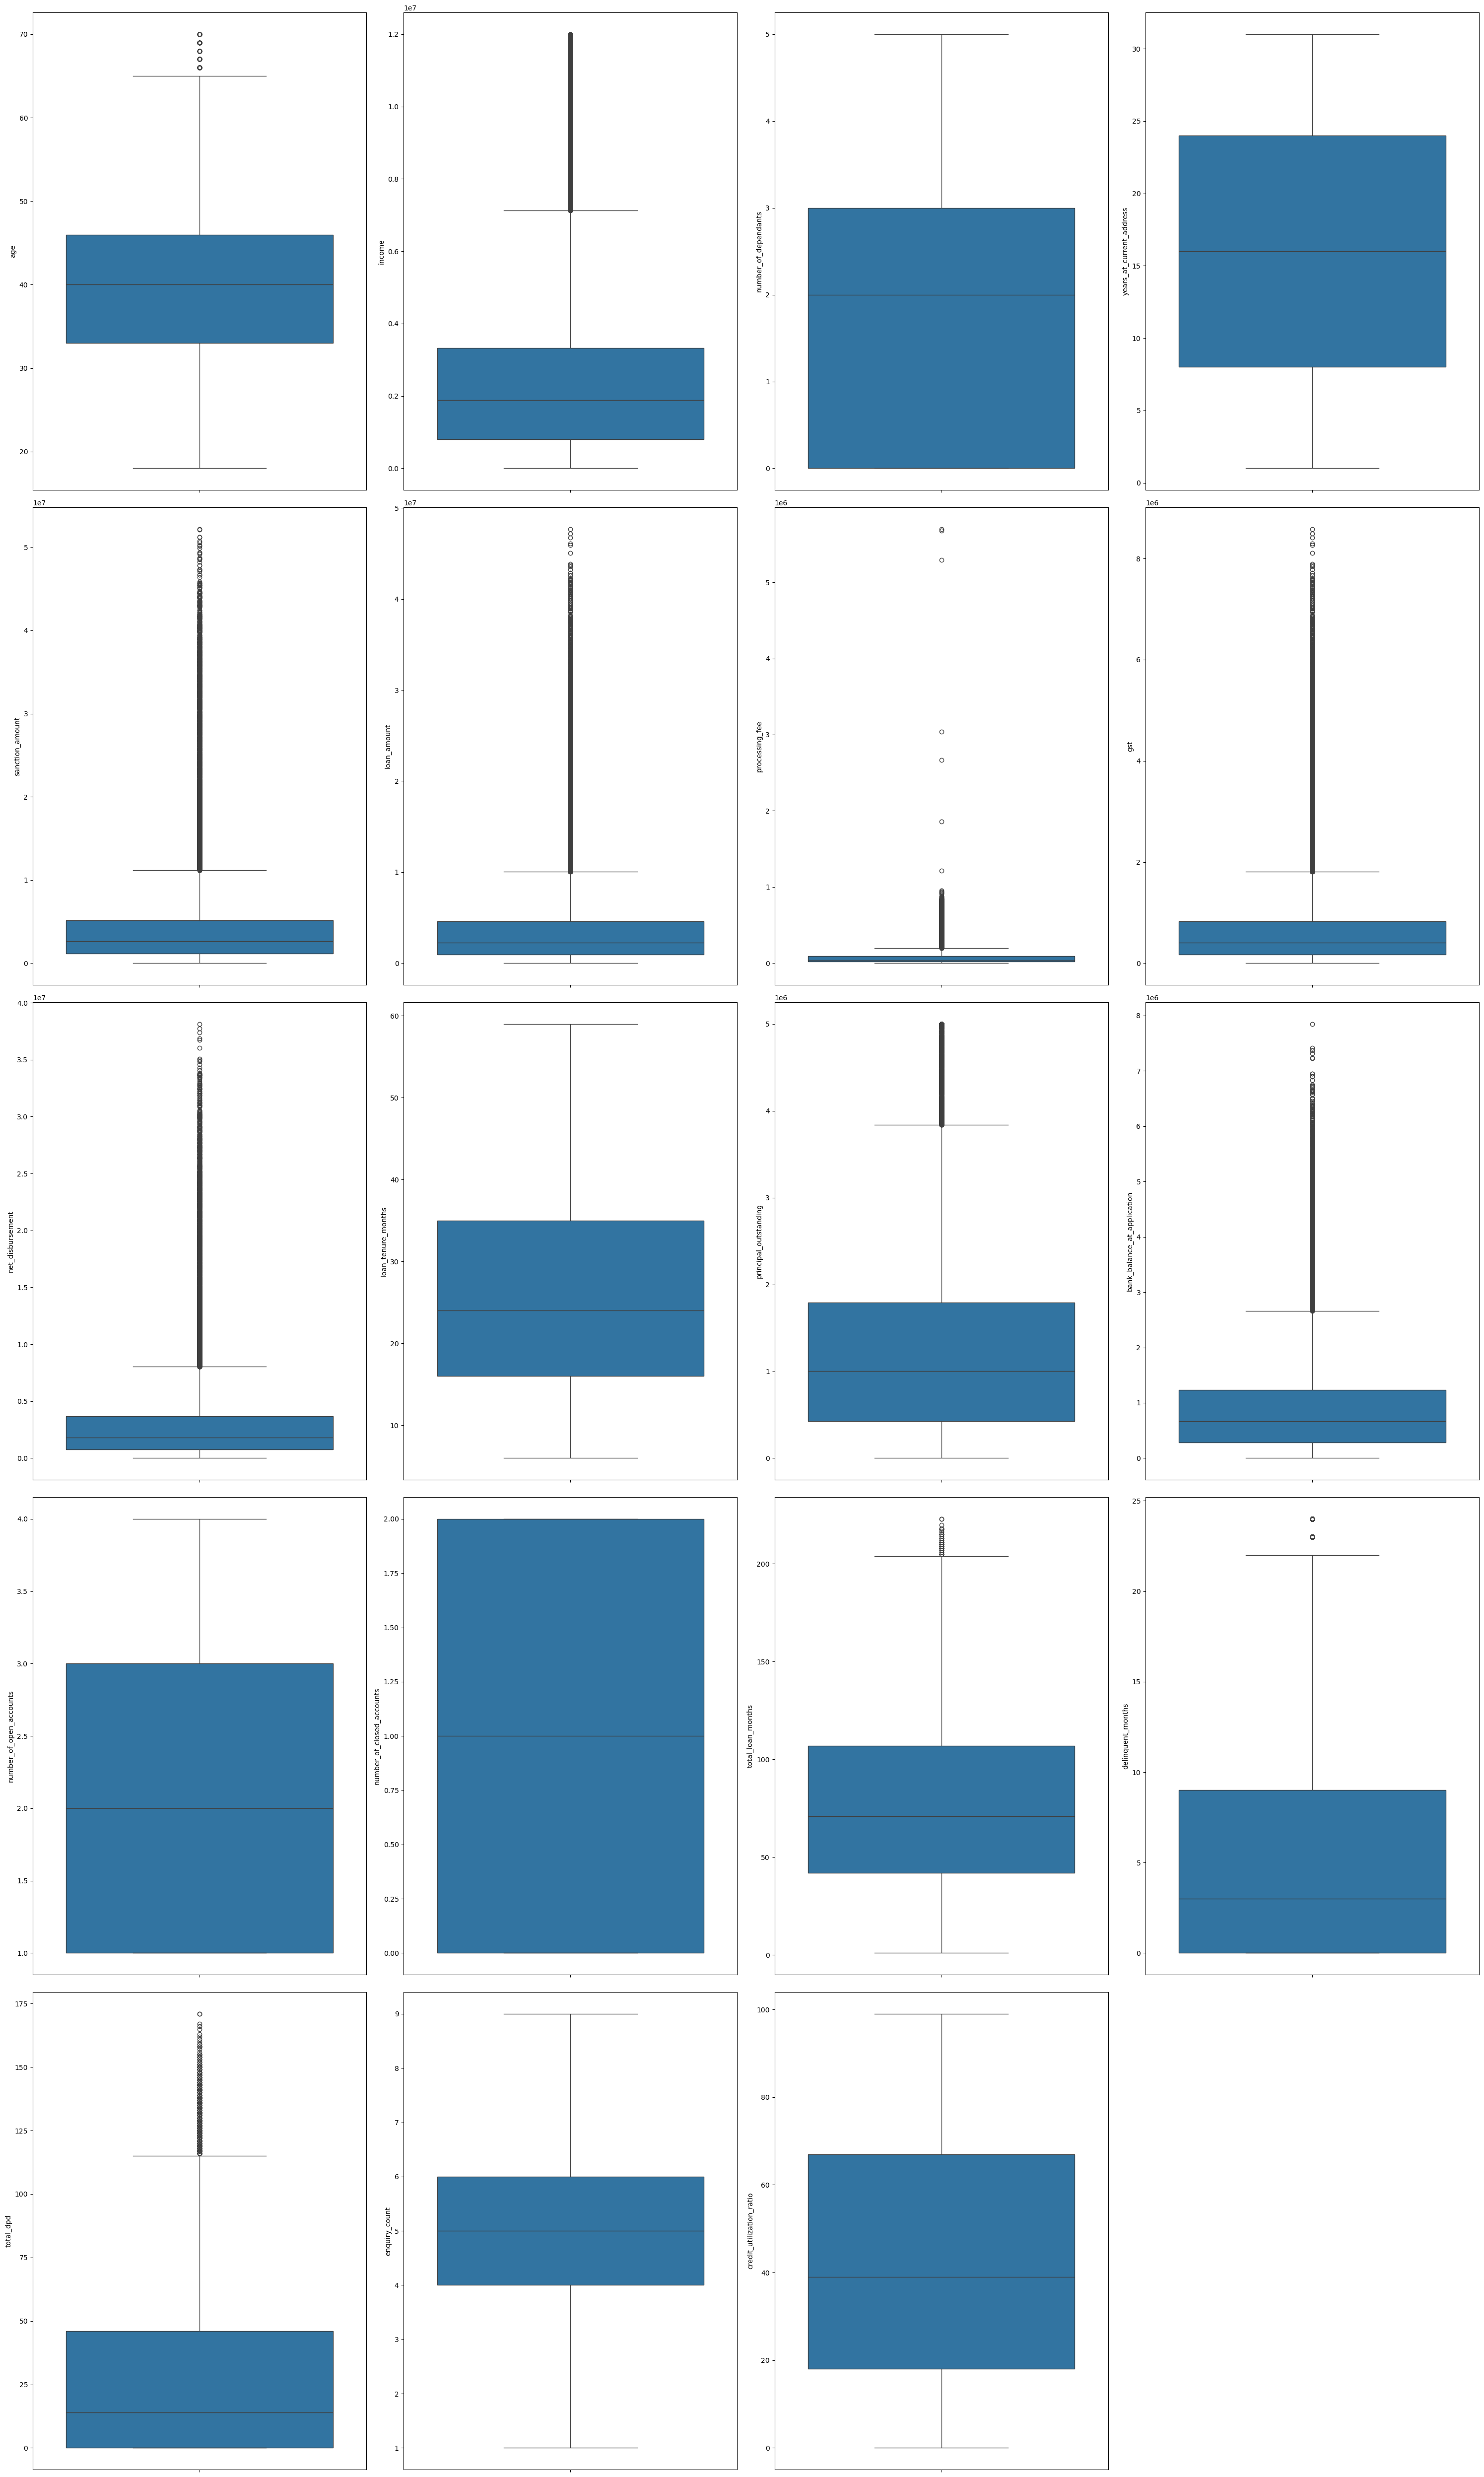

In [27]:
fig,axes=plt.subplots(5,4,figsize=(30,50))
axes=axes.flatten()

for ax,col in zip(axes,continous_columns):
    sns.boxplot(df_train[col],ax=ax)
    plt.title(col)
   
for ax in axes[len(continous_columns):]:
    ax.set_visible(False)

    
plt.tight_layout()
plt.show()


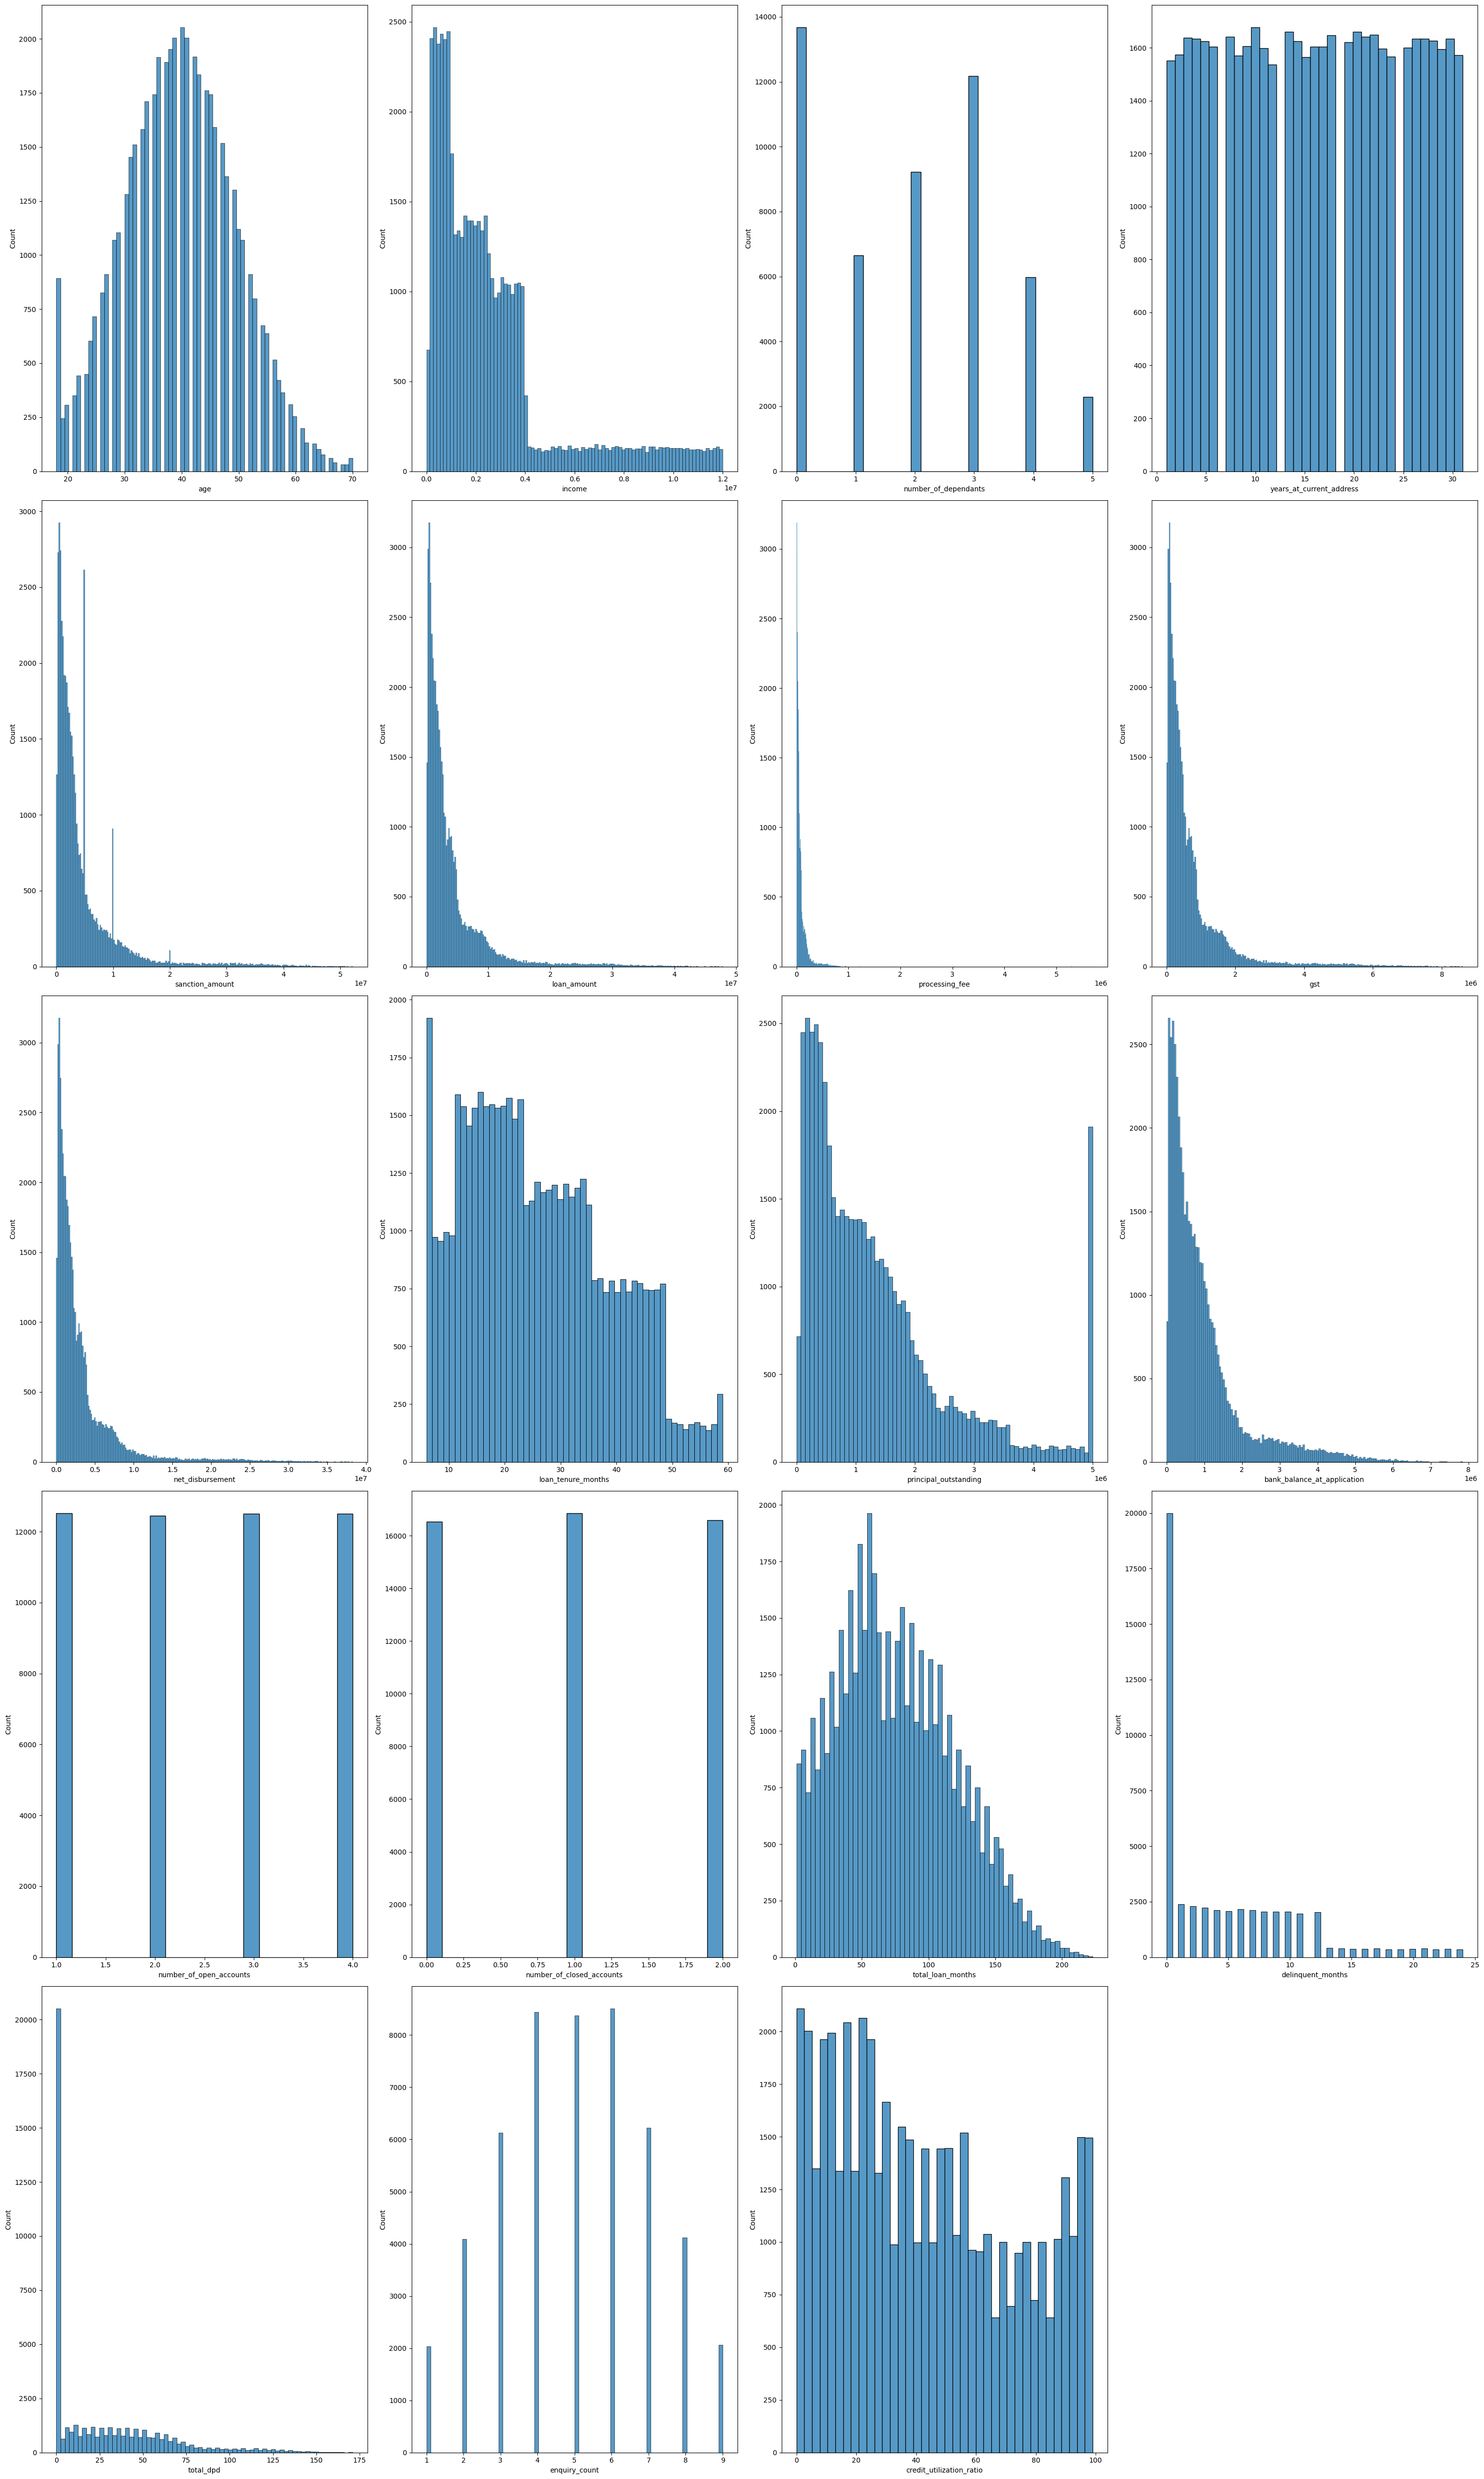

In [28]:
fig,axes=plt.subplots(5,4,figsize=(30,50))
axes=axes.flatten()

for ax,col in zip(axes,df_train[continous_columns]):
    sns.histplot(data=df,x=col,ax=ax)
    plt.title(col)

for ax in axes[len(continous_columns):]:
    ax.set_visible(False)
plt.tight_layout()
plt.show()

In [29]:
df_train.processing_fee.describe().astype(int)

count      37500
mean       80724
std       120830
min            0
25%        19180
50%        44700
75%        92000
max      5698029
Name: processing_fee, dtype: int32

In [30]:
df_train[(df_train.processing_fee/df_train.loan_amount)>0.03][["loan_amount","processing_fee"]]

,loan_amount,processing_fee
23981,2234000,2.669791e+06
9898,3626000,5.293544e+06
47089,1738000,1.858965e+06
33705,3812000,5.678021e+06
12294,4639000,5.698030e+06
28174,966000,1.214493e+06
29305,2616000,3.036378e+06


In [31]:
df_train_1=df_train[(df_train.processing_fee/df_train.loan_amount)<0.03].copy()

In [32]:
df_train_1[(df_train_1.processing_fee/df_train_1.loan_amount)>0.03][["loan_amount","processing_fee"]]

,loan_amount,processing_fee


In [33]:
df_test=df_test[(df_test.processing_fee/df_test.loan_amount)<0.03].copy()

In [34]:
for col in columns_categorical:
    print(f"{col}:{df_train_1[col].unique()}")

gender:['F' 'M']
marital_status:['Single' 'Married']
employment_status:['Salaried' 'Self-Employed']
residence_type:['Owned' 'Mortgage' 'Rented']
city:['Ahmedabad' 'Delhi' 'Lucknow' 'Bangalore' 'Jaipur' 'Hyderabad' 'Kolkata'
 'Pune' 'Chennai' 'Mumbai']
state:['Gujarat' 'Delhi' 'Uttar Pradesh' 'Karnataka' 'Rajasthan' 'Telangana'
 'West Bengal' 'Maharashtra' 'Tamil Nadu']
zipcode:[380001 110001 226001 560001 302001 500001 700001 411001 600001 400001]
loan_purpose:['Home' 'Auto' 'Personal' 'Education' 'Personaal']
loan_type:['Secured' 'Unsecured']
default:[0 1]


In [35]:
df_train_1.loan_purpose=df_train_1.loan_purpose.str.replace('Personaal','Personal')

In [36]:
df_train_1.loan_purpose.unique()

array(['Home', 'Auto', 'Personal', 'Education'], dtype=object)

In [37]:
df_test.loan_purpose=df_test.loan_purpose.str.replace('Personaal','Personal')

<center><h1>EDA </h1></center>

In [38]:
df_train_1[(df_train_1.gst/df_train_1.loan_amount)>0.2]

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default


<Axes: xlabel='age', ylabel='Density'>

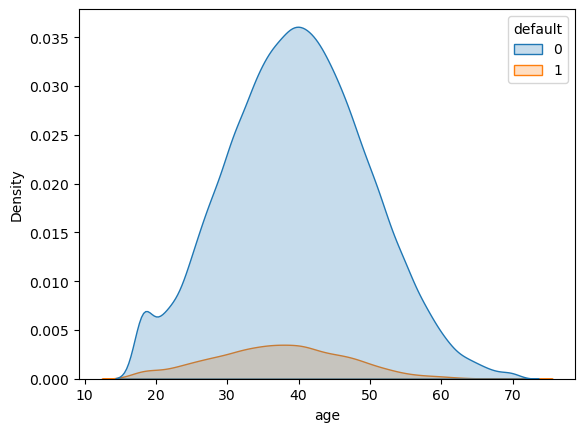

In [39]:
sns.kdeplot(data=df_train_1,x='age',fill=True,hue='default')

<Axes: xlabel='age', ylabel='Count'>

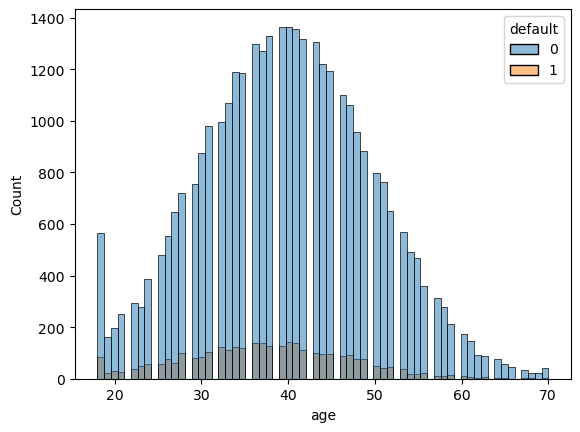

In [40]:
sns.histplot(data=df_train_1,x='age',fill=True,hue='default')

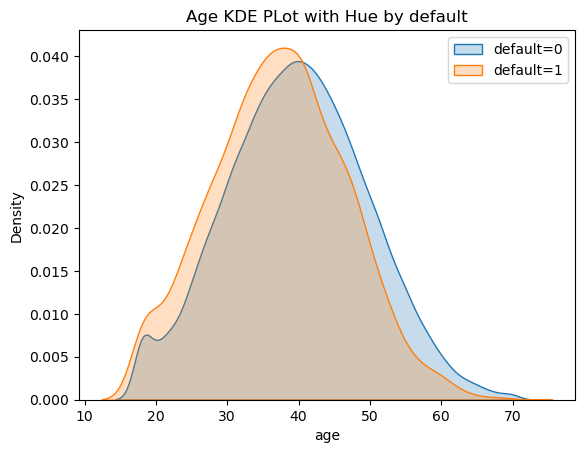

In [41]:
sns.kdeplot(data=df_train_1[df_train_1.default==0]['age'],fill=True,label='default=0')
sns.kdeplot(data=df_train_1[df_train_1.default==1]['age'],fill=True,label='default=1')
plt.title(f"Age KDE PLot with Hue by default")
plt.legend()
plt.show()

Insights:
people with younger have higher tendency to default

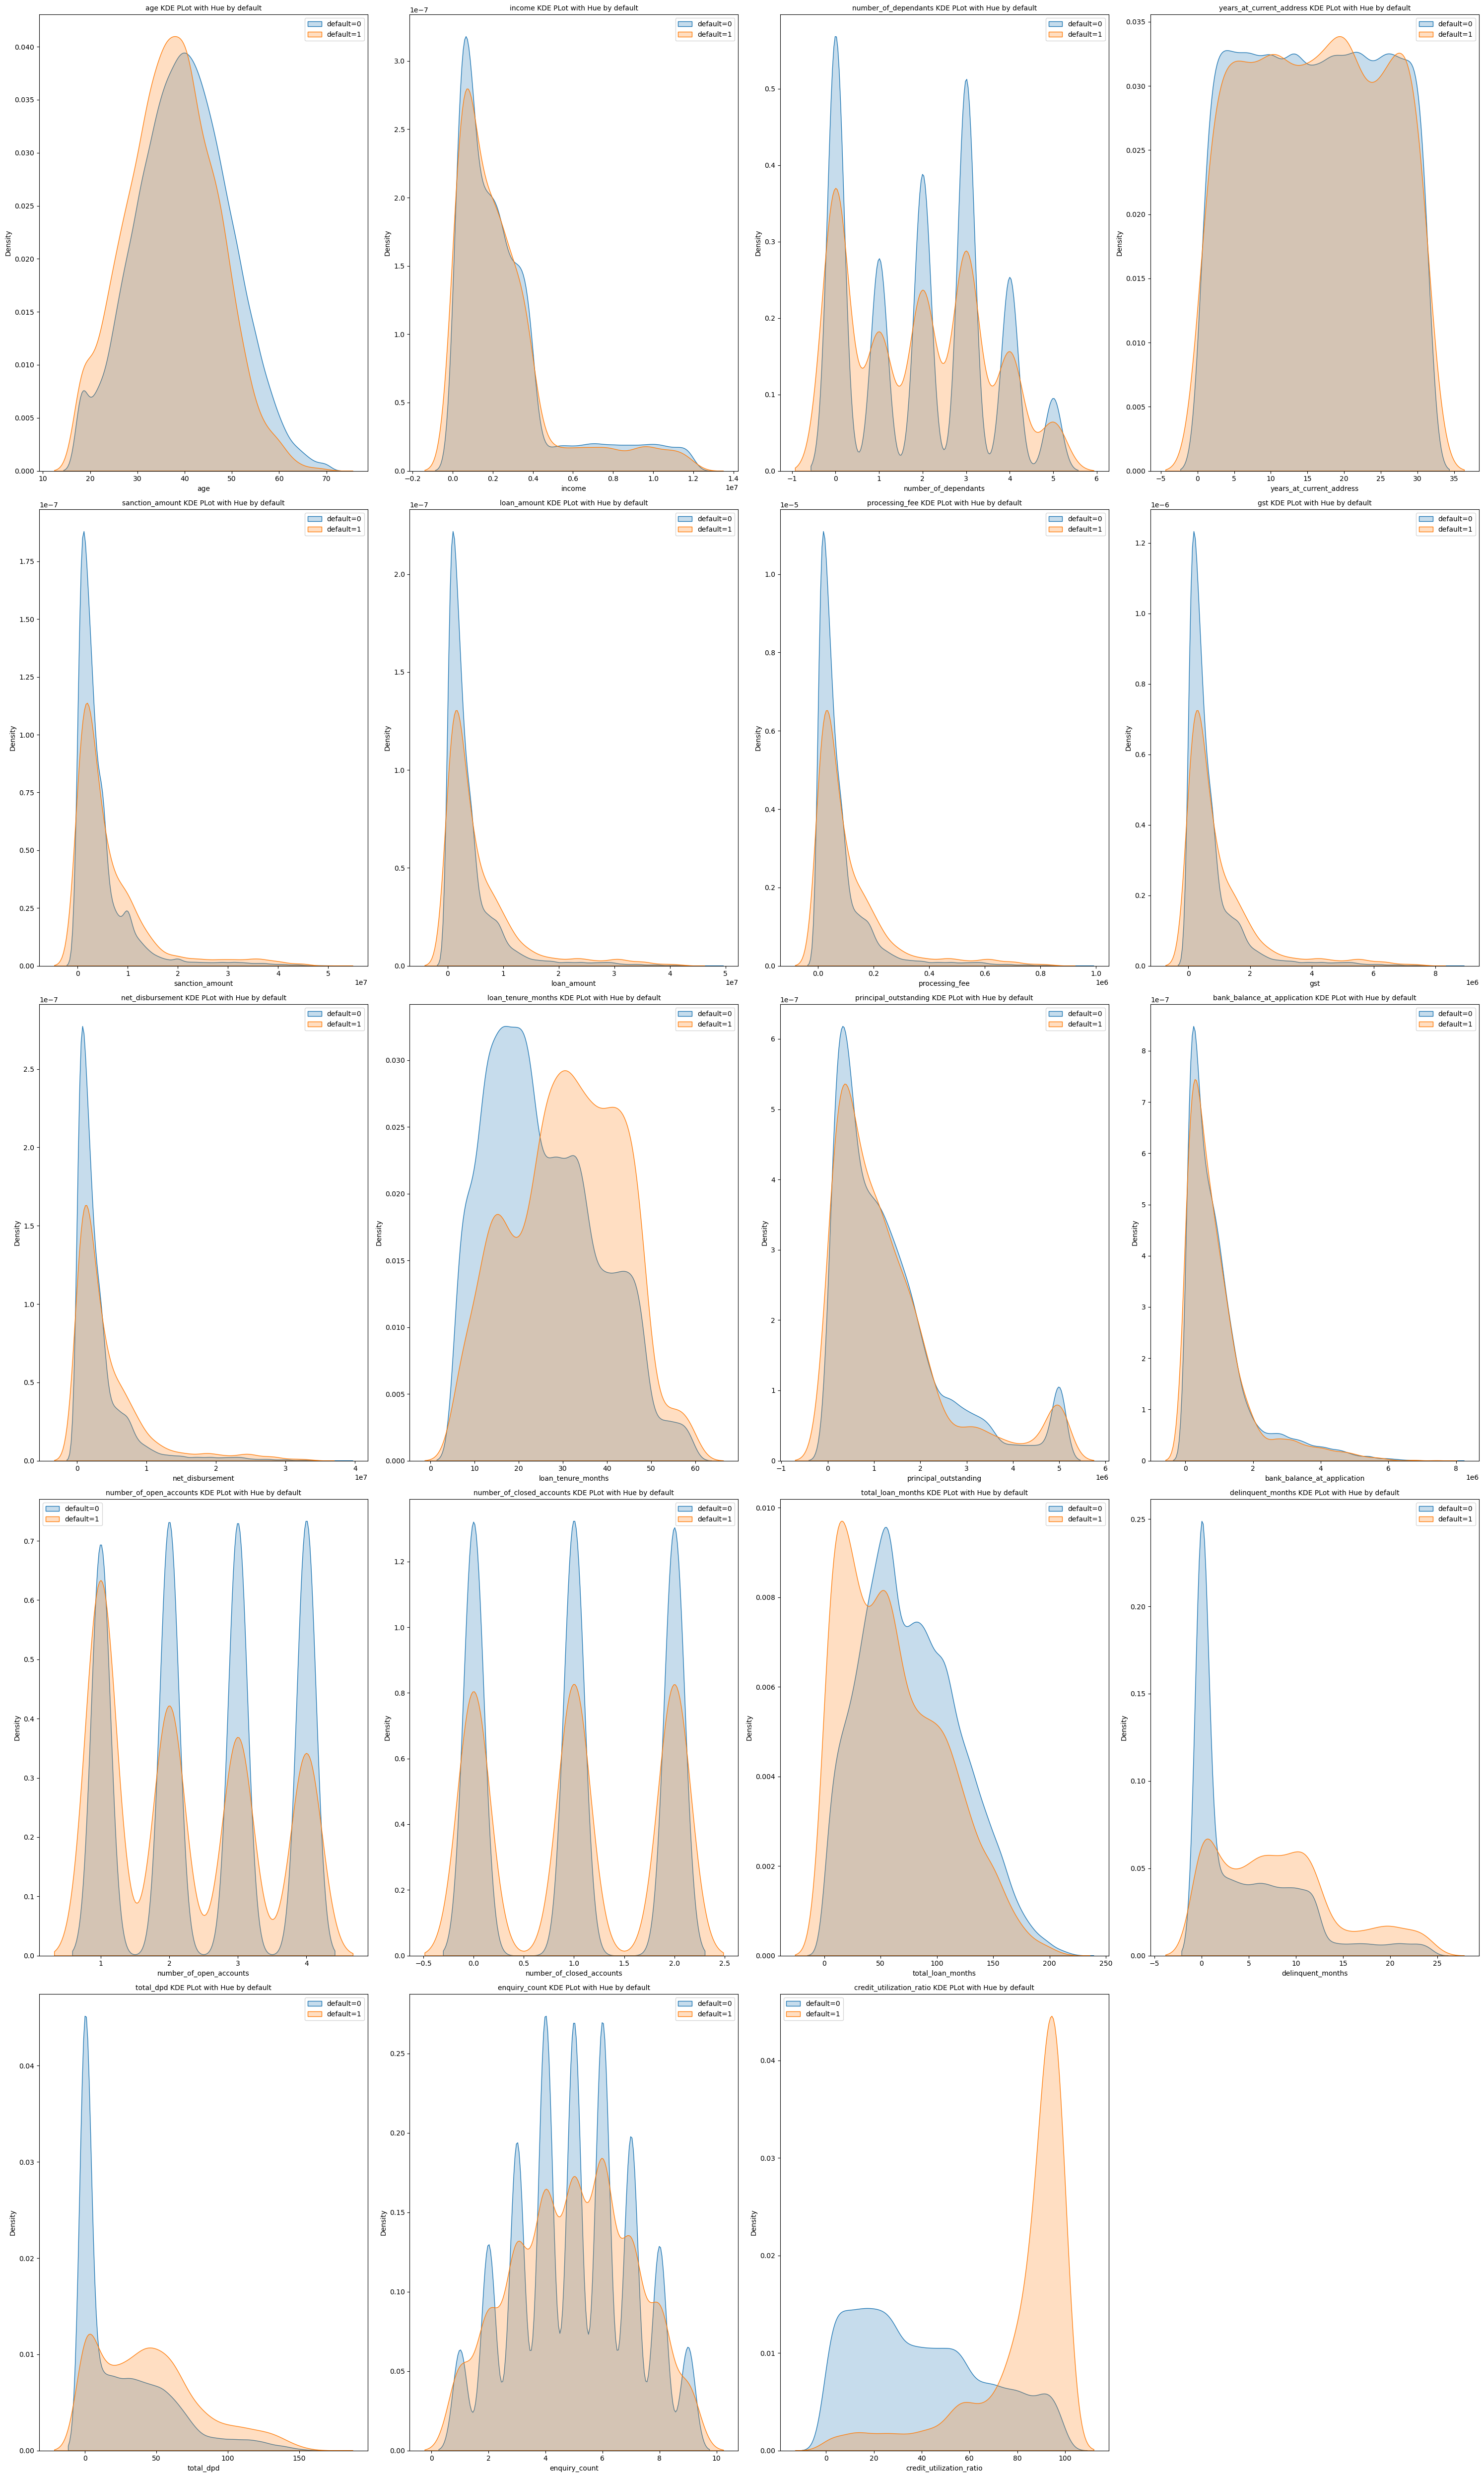

In [42]:
fig,axes=plt.subplots(5,4,figsize=(30,50))
axes=axes.flatten()

for ax,col in zip(axes,df_train_1[continous_columns]):
    sns.kdeplot(data=df_train_1[df_train_1.default==0][col],fill=True,label='default=0',ax=ax)
    sns.kdeplot(data=df_train_1[df_train_1.default==1][col],fill=True,label='default=1',ax=ax)
    ax.set_title(f"{col} KDE PLot with Hue by default",fontsize=10)
    ax.legend()

  

for ax in axes[len(continous_columns):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

    
    

<h3><centre>Insights</centre></h3>
1.Total dpd,credit utilization,delinquent_month,loan_tenure_month can be good indicators to find probable defaulters<br>
2.Why loan and income are not acting as good indicators?May be we should consider a new parametre together may be loan to income ratio.

In [43]:
df_train_1[["loan_amount","income"]].head(2)

,loan_amount,income
27434,3276000,1131000
13400,2540000,2343000


In [44]:
df_train_1["loan_to_income"]=df_train_1["loan_amount"]/df_train["income"].round(2)
df_test["loan_to_income"]=df_test["loan_amount"]/df_test["income"].round(2)

In [45]:
df_train_1[["loan_amount","income","loan_to_income"]].head(2)

,loan_amount,income,loan_to_income
27434,3276000,1131000,2.896552
13400,2540000,2343000,1.084080


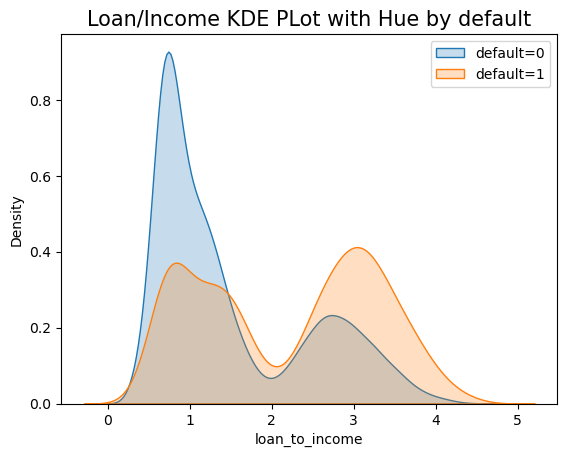

In [46]:
sns.kdeplot(data=df_train_1[df_train_1.default==0]["loan_to_income"],fill=True,label='default=0')
sns.kdeplot(data=df_train_1[df_train_1.default==1]["loan_to_income"],fill=True,label='default=1')
plt.title(f"Loan/Income KDE PLot with Hue by default",fontsize=15)
plt.legend()

plt.show()

indicator:
This indicated that higher the Loan to Income Ratio higher is the probablity of people defaulting

In [47]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income'],
      dtype='object')

In [48]:
df_train_1["avg_dpd_per_delinquency"]=np.where(df_train_1['delinquent_months']==0,0,df_train_1['total_dpd']/df_train_1['delinquent_months'].round(2))
df_test["avg_dpd_per_delinquency"]=np.where(df_test['delinquent_months']==0,0,df_test['total_dpd']/df_test['delinquent_months'].round(2))


In [49]:
df_train_1[['delinquent_months','total_dpd','avg_dpd_per_delinquency']].head(2)

,delinquent_months,total_dpd,avg_dpd_per_delinquency
27434,6,33,5.50
13400,4,17,4.25


In [50]:
df_train_1["avg_dpd_per_delinquency"].describe()

count    37487.000000
mean         3.294626
std          2.903357
min          0.000000
25%          0.000000
50%          4.333333
75%          5.750000
max         10.000000
Name: avg_dpd_per_delinquency, dtype: float64

In [51]:
df_train_1["avg_dpd_per_delinquency"].isna().sum()

0

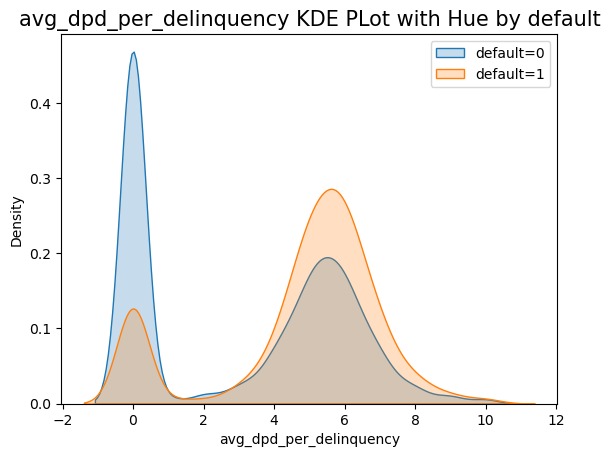

In [52]:
sns.kdeplot(data=df_train_1[df_train_1.default==0]["avg_dpd_per_delinquency"],fill=True,label='default=0')
sns.kdeplot(data=df_train_1[df_train_1.default==1]["avg_dpd_per_delinquency"],fill=True,label='default=1')
plt.title(f"avg_dpd_per_delinquency KDE PLot with Hue by default",fontsize=15)
plt.legend()

plt.show()

In [53]:
df_train_1["delinquency_ratio"]=df_train_1['delinquent_months']*100/df_train_1['total_loan_months'].round(2)
df_test["delinquency_ratio"]=df_test['delinquent_months']*100/df_test['total_loan_months'].round(2)
df_train_1[['delinquent_months','total_loan_months',"delinquency_ratio"]].head(2)

,delinquent_months,total_loan_months,delinquency_ratio
27434,6,90,6.666667
13400,4,119,3.361345


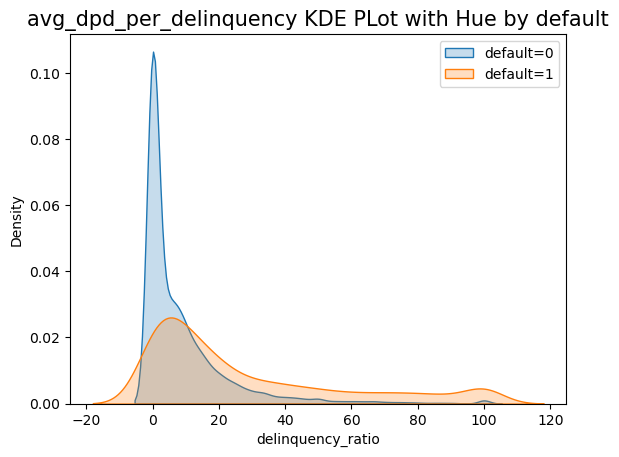

In [54]:
sns.kdeplot(data=df_train_1[df_train_1.default==0]["delinquency_ratio"],fill=True,label='default=0')
sns.kdeplot(data=df_train_1[df_train_1.default==1]["delinquency_ratio"],fill=True,label='default=1')
plt.title(f"avg_dpd_per_delinquency KDE PLot with Hue by default",fontsize=15)
plt.legend()

plt.show()

## Feature Selection

In [55]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'avg_dpd_per_delinquency', 'delinquency_ratio'],
      dtype='object')

In [56]:
df_train_2=df_train_1.drop(['cust_id','loan_id'],axis=1)
df_test=df_test.drop(['cust_id','loan_id'],axis=1)

In [57]:
df_train_3=df_train_2.drop(['disbursal_date', 'installment_start_dt','loan_amount','income','total_loan_months','delinquent_months',
       'total_dpd'],axis=1)
df_test=df_test.drop(['disbursal_date', 'installment_start_dt','loan_amount','income','total_loan_months','delinquent_months',
       'total_dpd'],axis=1)

In [58]:
df_train_3.select_dtypes(include='number').columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'avg_dpd_per_delinquency', 'delinquency_ratio'],
      dtype='object')

In [59]:
df_train_3['zipcode']=df_train_3['zipcode'].astype('object')
df_test['zipcode']=df_test['zipcode'].astype('object')

In [60]:
X_train=df_train_3.drop('default',axis=1)
y_train=df_train_3['default']
from sklearn.preprocessing import MinMaxScaler
columns_to_scale=X_train.select_dtypes(include='number').columns
scalar=MinMaxScaler()
X_train[columns_to_scale]=scalar.fit_transform(X_train[columns_to_scale])
X_train.describe()

,age,number_of_dependants,years_at_current_address,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,avg_dpd_per_delinquency,delinquency_ratio
count,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000
mean,0.414681,0.388476,0.499787,0.088989,0.083030,0.083030,0.083030,0.375431,0.261931,0.123683,0.498795,0.498386,0.500410,0.437656,0.294842,0.329463,0.103945
std,0.189510,0.307163,0.297939,0.120709,0.113437,0.113437,0.113437,0.234410,0.244515,0.133507,0.372407,0.407528,0.252997,0.296517,0.227896,0.290336,0.172685
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.288462,0.000000,0.233333,0.020440,0.019100,0.019100,0.019100,0.188679,0.078179,0.034088,0.000000,0.000000,0.375000,0.181818,0.110901,0.000000,0.000000
50%,0.423077,0.400000,0.500000,0.049536,0.045887,0.045887,0.045887,0.339623,0.194385,0.082720,0.333333,0.500000,0.500000,0.393939,0.201436,0.433333,0.037975
75%,0.538462,0.600000,0.766667,0.097660,0.095512,0.095512,0.095512,0.547170,0.353152,0.155525,0.666667,1.000000,0.625000,0.676768,0.505510,0.575000,0.131148
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
X_test=df_test.drop('default',axis=1)
y_test=df_test['default']

X_test[columns_to_scale]= scalar.transform(X_test[columns_to_scale])
X_test.describe()

,age,number_of_dependants,years_at_current_address,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,avg_dpd_per_delinquency,delinquency_ratio
count,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000
mean,0.413678,0.386174,0.503088,0.088840,0.082764,0.082764,0.082764,0.378690,0.263201,0.124546,0.503681,0.506961,0.503471,0.439030,0.295290,0.330726,0.104143
std,0.189011,0.306940,0.296372,0.119051,0.111372,0.111372,0.111372,0.235128,0.245299,0.134018,0.374460,0.405600,0.255602,0.296583,0.226778,0.290738,0.173989
min,0.000000,0.000000,0.000000,0.000019,0.000126,0.000126,0.000126,0.000000,-0.000163,0.000216,0.000000,0.000000,0.000000,0.000000,0.000989,0.000000,0.000000
25%,0.288462,0.000000,0.233333,0.021208,0.019725,0.019725,0.019725,0.188679,0.078853,0.034518,0.000000,0.000000,0.375000,0.181818,0.111475,0.000000,0.000000
50%,0.423077,0.400000,0.500000,0.049871,0.046244,0.046244,0.046244,0.358491,0.195309,0.083575,0.666667,0.500000,0.500000,0.393939,0.205120,0.433333,0.037736
75%,0.538462,0.600000,0.766667,0.099138,0.096693,0.096693,0.096693,0.547170,0.354632,0.156611,1.000000,1.000000,0.750000,0.676768,0.505183,0.574728,0.129032
max,1.000000,1.000000,1.000000,0.951002,1.003192,1.003192,1.003192,1.000000,1.000000,0.879450,1.000000,1.000000,1.000000,1.000000,1.006103,1.000000,1.000000


In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df=pd.DataFrame()
    vif_df['columns']=data.columns
    vif_df["VIF"]=[variance_inflation_factor(data,i) for i in range(data.shape[1])]
    return vif_df

In [63]:
calculate_vif(X_train[columns_to_scale])

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,columns,VIF
0,age,5.583145
1,number_of_dependants,2.722975
2,years_at_current_address,3.362002
3,sanction_amount,102.151552
4,processing_fee,inf
5,gst,inf
6,net_disbursement,inf
7,loan_tenure_months,6.133410
8,principal_outstanding,16.268386
9,bank_balance_at_application,9.266416


In [64]:
features_to_drop=['principal_outstanding','processing_fee','gst','net_disbursement','sanction_amount']
X_train_1=X_train.drop(features_to_drop,axis=1)
X_test=X_test.drop(features_to_drop,axis=1)

In [65]:
numeric_columns=X_train_1.select_dtypes(include='number').columns


In [66]:
vif_df=calculate_vif(X_train_1.select_dtypes(include='number'))
vif_df

,columns,VIF
0,age,5.292894
1,number_of_dependants,2.718535
2,years_at_current_address,3.339990
3,loan_tenure_months,5.971999
4,bank_balance_at_application,1.794592
5,number_of_open_accounts,4.314935
6,number_of_closed_accounts,2.327396
7,enquiry_count,6.283904
8,credit_utilization_ratio,2.875775
9,loan_to_income,4.524501


In [67]:
selected_numeric_features=vif_df["columns"].values
selected_numeric_features

array(['age', 'number_of_dependants', 'years_at_current_address',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_to_income',
       'avg_dpd_per_delinquency', 'delinquency_ratio'], dtype=object)

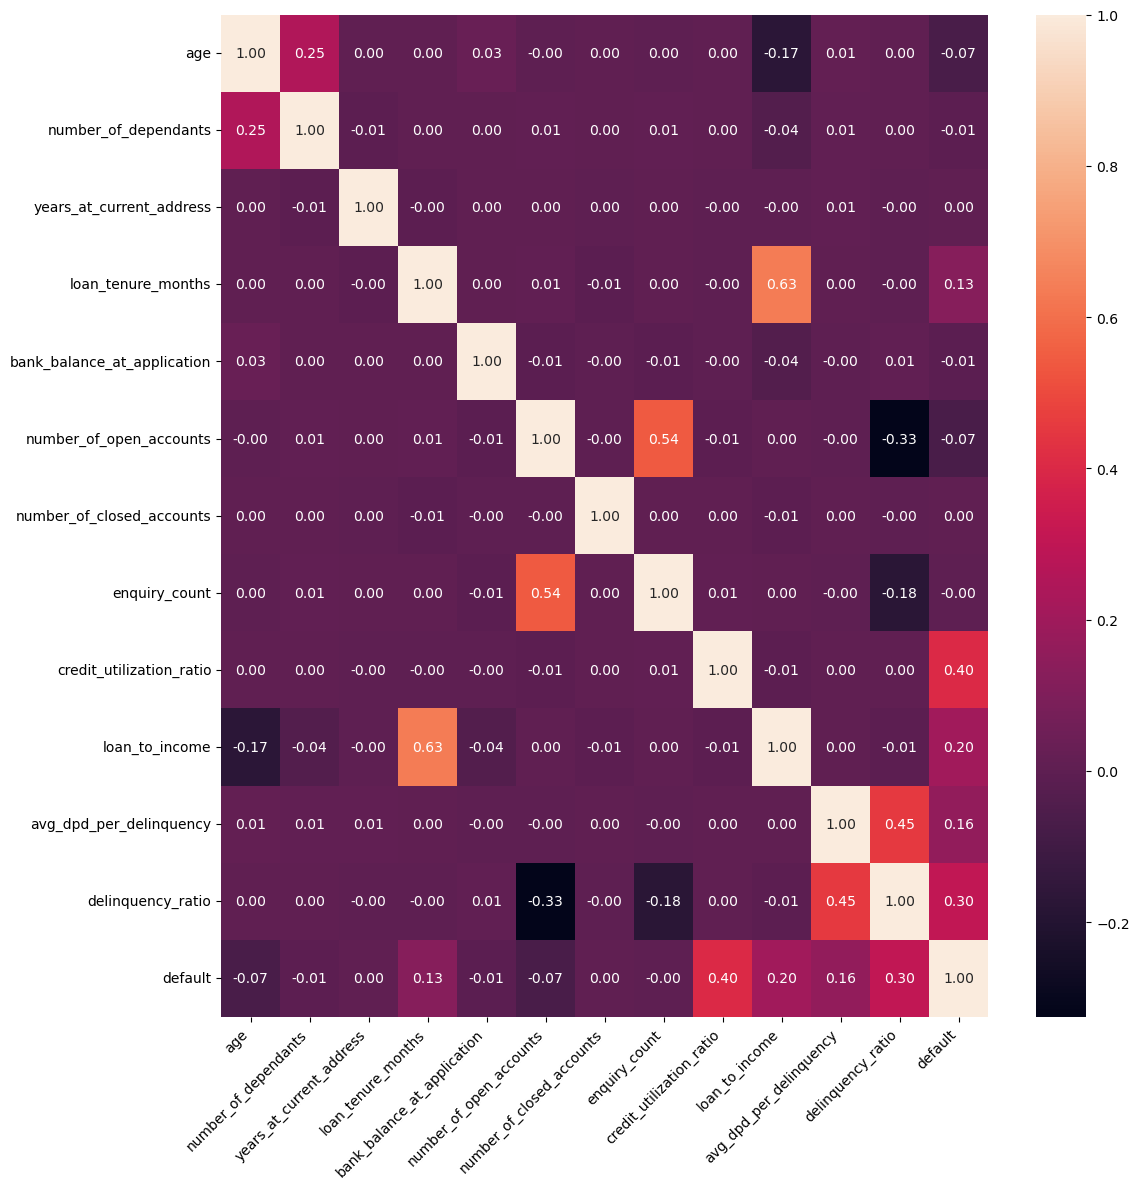

In [68]:
col1 = list(numeric_columns) + ['default']

plt.figure(figsize=(12, 12))
cm = df_train_3[col1].corr()
sns.heatmap(cm, annot=True, fmt='0.2f')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [69]:
temp=pd.concat([X_train_1,y_train],axis=1)
temp.groupby('loan_purpose').default.agg(['sum','count'])

,sum,count
loan_purpose,,
Auto,314,7437
Education,546,5626
Home,1744,11271
Personal,585,13153


In [70]:
def calculate_woe_iv(df, feature, target):
    
    grouped = df.groupby(feature)[target].agg(['count', 'sum'])
    grouped = grouped.rename(columns={'count': 'total', 'sum': 'good'})
    grouped['bad'] = grouped['total'] - grouped['good']
    total_good=grouped['good'].sum()
    total_bad=grouped['bad'].sum()
    grouped['good%']=(grouped['good']/total_good)
    grouped['bad%']=(grouped['bad']/total_bad)
    grouped['woe']=np.log(grouped['good%']/ grouped['bad%'])
    grouped['iv']= (grouped['woe']*(grouped['good%']-grouped['bad%']))
    total_iv=grouped['iv'].sum()
    return grouped,total_iv
    


grouped,total_iv=calculate_woe_iv(temp,'loan_purpose','default')

In [71]:
grouped

,total,good,bad,good%,bad%,woe,iv
loan_purpose,,,,,,,
Auto,7437,314,7123,0.098463,0.207680,-0.746312,0.081509
Education,5626,546,5080,0.171214,0.148114,0.144932,0.003348
Home,11271,1744,9527,0.546880,0.277771,0.677431,0.182303
Personal,13153,585,12568,0.183443,0.366435,-0.691918,0.126616


In [72]:
iv_values={}

for feature in X_train_1.columns:
    if X_train_1[feature].dtype=='object':
        grouped,iv=calculate_woe_iv(temp,feature,'default')
        iv_values[feature]=iv
    else:
        X_binned = pd.cut(X_train_1[feature], bins=10, labels=False)
        grouped,iv= calculate_woe_iv(pd.concat([X_binned, y_train], axis=1), feature, 'default')
        iv_values[feature] = iv
        
        
iv_values   

{'age': 0.07592687127752061,
 'gender': 0.000482276463421216,
 'marital_status': 0.002196681370832318,
 'employment_status': 0.002447818101774487,
 'number_of_dependants': 0.00364589452118596,
 'residence_type': 0.2594019617563985,
 'years_at_current_address': 0.001042536380353028,
 'city': 0.000817870465334103,
 'state': 0.0007881984519711978,
 'zipcode': 0.000817870465334103,
 'loan_purpose': 0.39377543144164784,
 'loan_type': 0.17304705897793143,
 'loan_tenure_months': 0.23450610202970526,
 'bank_balance_at_application': 0.004242001247914226,
 'number_of_open_accounts': 0.07324250836253295,
 'number_of_closed_accounts': 0.00026280824021760536,
 'enquiry_count': 0.005484982638303533,
 'credit_utilization_ratio': 2.4228228499400095,
 'loan_to_income': 0.49174039815337567,
 'avg_dpd_per_delinquency': 0.42123646562822287,
 'delinquency_ratio': 0.678322540101926}

In [73]:
list(iv_values.items())

[('age', 0.07592687127752061),
 ('gender', 0.000482276463421216),
 ('marital_status', 0.002196681370832318),
 ('employment_status', 0.002447818101774487),
 ('number_of_dependants', 0.00364589452118596),
 ('residence_type', 0.2594019617563985),
 ('years_at_current_address', 0.001042536380353028),
 ('city', 0.000817870465334103),
 ('state', 0.0007881984519711978),
 ('zipcode', 0.000817870465334103),
 ('loan_purpose', 0.39377543144164784),
 ('loan_type', 0.17304705897793143),
 ('loan_tenure_months', 0.23450610202970526),
 ('bank_balance_at_application', 0.004242001247914226),
 ('number_of_open_accounts', 0.07324250836253295),
 ('number_of_closed_accounts', 0.00026280824021760536),
 ('enquiry_count', 0.005484982638303533),
 ('credit_utilization_ratio', 2.4228228499400095),
 ('loan_to_income', 0.49174039815337567),
 ('avg_dpd_per_delinquency', 0.42123646562822287),
 ('delinquency_ratio', 0.678322540101926)]

In [74]:
iv_df=pd.DataFrame(list(iv_values.items()),columns=['Feature','IV'])
iv_df

,Feature,IV
0,age,0.075927
1,gender,0.000482
2,marital_status,0.002197
3,employment_status,0.002448
4,number_of_dependants,0.003646
5,residence_type,0.259402
6,years_at_current_address,0.001043
7,city,0.000818
8,state,0.000788
9,zipcode,0.000818


In [75]:
iv_df=iv_df.sort_values(by='IV',ascending=False)
iv_df

,Feature,IV
17,credit_utilization_ratio,2.422823
20,delinquency_ratio,0.678323
18,loan_to_income,0.491740
19,avg_dpd_per_delinquency,0.421236
10,loan_purpose,0.393775
5,residence_type,0.259402
12,loan_tenure_months,0.234506
11,loan_type,0.173047
0,age,0.075927
14,number_of_open_accounts,0.073243


In [76]:
selected_feature=iv_df[iv_df["IV"]>0.02]

In [77]:
selected_features=[i for i in selected_feature["Feature"].values]
selected_features

['credit_utilization_ratio',
 'delinquency_ratio',
 'loan_to_income',
 'avg_dpd_per_delinquency',
 'loan_purpose',
 'residence_type',
 'loan_tenure_months',
 'loan_type',
 'age',
 'number_of_open_accounts']

Feature Encoding

In [78]:
X_train_reduced=X_train_1[selected_features]
X_test_reduced=X_test[selected_features]

In [79]:
X_train_reduced.head()

,credit_utilization_ratio,delinquency_ratio,loan_to_income,avg_dpd_per_delinquency,loan_purpose,residence_type,loan_tenure_months,loan_type,age,number_of_open_accounts
27434,0.595960,0.066667,0.609125,0.550000,Home,Owned,0.339623,Secured,0.519231,1.000000
13400,0.929293,0.033613,0.184564,0.425000,Auto,Owned,0.509434,Secured,0.211538,0.666667
883,0.838384,0.168675,0.086193,0.557143,Personal,Mortgage,0.245283,Unsecured,0.615385,0.333333
7303,0.343434,0.000000,0.187259,0.000000,Auto,Owned,0.283019,Secured,0.480769,0.000000
45124,0.191919,0.096774,0.362564,0.466667,Education,Owned,0.735849,Secured,0.250000,0.333333


In [80]:
X_test_reduced.head()

,credit_utilization_ratio,delinquency_ratio,loan_to_income,avg_dpd_per_delinquency,loan_purpose,residence_type,loan_tenure_months,loan_type,age,number_of_open_accounts
33553,0.121212,0.042857,0.257996,0.900,Education,Owned,0.528302,Secured,0.346154,0.333333
9427,0.858586,0.000000,0.689661,0.000,Home,Owned,0.622642,Secured,0.288462,1.000000
199,0.727273,0.000000,0.636856,0.000,Home,Owned,0.622642,Secured,0.192308,1.000000
12447,0.909091,0.000000,0.188035,0.000,Auto,Rented,0.188679,Secured,0.192308,0.666667
39489,0.535354,0.131579,0.169262,0.525,Auto,Owned,0.377358,Secured,0.653846,1.000000


In [81]:
X_train_encoded=pd.get_dummies(X_train_reduced,drop_first=True)
X_test_encoded=pd.get_dummies(X_test_reduced,drop_first=True)
X_train_encoded

,credit_utilization_ratio,delinquency_ratio,loan_to_income,avg_dpd_per_delinquency,loan_tenure_months,age,number_of_open_accounts,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,residence_type_Owned,residence_type_Rented,loan_type_Unsecured
27434,0.595960,0.066667,0.609125,0.550000,0.339623,0.519231,1.000000,False,True,False,True,False,False
13400,0.929293,0.033613,0.184564,0.425000,0.509434,0.211538,0.666667,False,False,False,True,False,False
883,0.838384,0.168675,0.086193,0.557143,0.245283,0.615385,0.333333,False,False,True,False,False,True
7303,0.343434,0.000000,0.187259,0.000000,0.283019,0.480769,0.000000,False,False,False,True,False,False
45124,0.191919,0.096774,0.362564,0.466667,0.735849,0.250000,0.333333,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.939394,0.178295,0.248651,0.547826,0.245283,0.288462,1.000000,False,False,False,False,True,False
44732,0.232323,0.000000,0.249977,0.000000,0.113208,0.288462,0.666667,False,False,False,True,False,False
38158,0.535354,0.000000,0.566568,0.000000,0.792453,0.326923,0.000000,False,True,False,False,True,False
860,0.171717,0.038462,0.281386,0.480000,0.301887,0.461538,0.666667,True,False,False,True,False,False


<h1><center> Model Evaluation</h1></center>

#### Attempt 1</br>
1.Logistic Regression ,Random Forest and XGB</br>
2.No Handling of class imbalence

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model=LogisticRegression()
model.fit(X_train_encoded,y_train)

y_pred=model.predict(X_test_encoded)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.84      0.69      0.76      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.84      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [83]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
model.fit(X_train_encoded,y_train)

y_pred=model.predict(X_test_encoded)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.85      0.69      0.76      1108

    accuracy                           0.96     12498
   macro avg       0.91      0.84      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [84]:
from xgboost import XGBClassifier

model=RandomForestClassifier()
model.fit(X_train_encoded,y_train)

y_pred=model.predict(X_test_encoded)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.84      0.70      0.76      1108

    accuracy                           0.96     12498
   macro avg       0.91      0.84      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [85]:
from sklearn.model_selection import RandomizedSearchCV
log_reg = LogisticRegression(max_iter=1000)

# Step 4: Create the parameter grid
param_dist = {
    'C': np.logspace(-4, 4, 20),                  # Regularization strength
    'solver': ['liblinear', 'saga', 'lbfgs','newton-cg'],     # Solvers compatible with logistic regression
     
}

# Step 5: Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,           # Number of parameter settings to try
    cv=3,                # 5-fold cross-validation
    scoring='f1',  # Or 'roc_auc', etc.
    random_state=42,
    n_jobs=-1            # Use all processors
)

# Step 6: Fit the model

random_search.fit(X_train_encoded,y_train)

# Step 7: Output best results
print("Best Parameters:", random_search.best_params_)
print("Best Cross-validation Score:", random_search.best_score_)
best_model=random_search.best_estimator_




y_pred=best_model.predict(X_test_encoded)
report=classification_report(y_test,y_pred)
print(report)

Best Parameters: {'solver': 'lbfgs', 'C': 545.5594781168514}
Best Cross-validation Score: 0.7629892080748256
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.83      0.71      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.85      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [86]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Define parameter distribution
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 5, 10],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]
}

# Initialize the model
xgb = XGBClassifier()

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=100,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train_encoded, y_train)

# Output best parameters and score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

# Predict with best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)

# Optional: evaluate predictions
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 1.0, 'scale_pos_weight': 2, 'reg_lambda': 10.0, 'reg_alpha': 0.1, 'n_estimators': 150, 'max_depth': 3, 'learning_rate': 0.15, 'colsample_bytree': 0.8}
Best Score: 0.7946514391031122
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11390
           1       0.78      0.81      0.80      1108

    accuracy                           0.96     12498
   macro avg       0.88      0.90      0.89     12498
weighted avg       0.96      0.96      0.96     12498



#### Attempt 2</br>
1.Logistic Regression and XGB</br>
2.Handling of class imbalence using <b>Under Sampling</b>

In [87]:
from imblearn.under_sampling import RandomUnderSampler

rus= RandomUnderSampler()
X_train_rus,y_train_rus=rus.fit_resample(X_train_encoded,y_train)
y_train_rus.value_counts()

default
0    3189
1    3189
Name: count, dtype: int64

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model=LogisticRegression()
model.fit(X_train_rus,y_train_rus)

y_pred=model.predict(X_test_encoded)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11390
           1       0.51      0.96      0.67      1108

    accuracy                           0.92     12498
   macro avg       0.75      0.93      0.81     12498
weighted avg       0.95      0.92      0.93     12498



In [89]:
from xgboost import XGBClassifier

model=RandomForestClassifier()
model.fit(X_train_rus,y_train_rus)

y_pred=model.predict(X_test_encoded)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11390
           1       0.53      0.97      0.68      1108

    accuracy                           0.92     12498
   macro avg       0.76      0.94      0.82     12498
weighted avg       0.96      0.92      0.93     12498



#### Attempt 3</br>
1.Logistic Regression and XGB</br>
2.Handling of class imbalence using <b>Smote Tomek</b></br>
3.parametre tuning using <b>optuna</b>

In [90]:
from imblearn.combine import SMOTETomek
smt= SMOTETomek(random_state=42)
X_train_smt,y_train_smt=smt.fit_resample(X_train_encoded,y_train)
y_train_smt.value_counts()

default
0    34226
1    34226
Name: count, dtype: int64

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model=LogisticRegression()
model.fit(X_train_smt,y_train_smt)

y_pred=model.predict(X_test_encoded)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.57      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.83     12498
weighted avg       0.96      0.93      0.94     12498



In [92]:
!C:\ProgramData\anaconda3\python.exe -m pip install optuna

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score



Defaulting to user installation because normal site-packages is not writeable


In [93]:
import optuna
def objective(trial):
    params = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),  # Log-uniform sampling for regularization
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),  # Solvers
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),  # Tolerance for stopping criteria
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])  # Weight balancing
    }

    model = LogisticRegression(**params, max_iter=10000)  # Model with suggested parameters

    f1_scorer = make_scorer(f1_score, average='macro')  # Using macro average for multiclass
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)  # 3-fold CV

    return np.mean(scores)  # Return average F1 score

study_logistic=optuna.create_study(direction='maximize')
study_logistic.optimize(objective,n_trials=50)

[I 2025-08-04 20:29:17,699] A new study created in memory with name: no-name-7f4d9dad-04fe-44f9-aff8-8d573af9ef7b
[I 2025-08-04 20:29:18,022] Trial 0 finished with value: 0.908868766482004 and parameters: {'C': 0.001608944469897998, 'solver': 'newton-cg', 'tol': 4.680636978431399e-06, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.908868766482004.
[I 2025-08-04 20:29:18,213] Trial 1 finished with value: 0.8578712404221808 and parameters: {'C': 29.47126579005876, 'solver': 'newton-cg', 'tol': 0.032031780597391486, 'class_weight': None}. Best is trial 0 with value: 0.908868766482004.
[I 2025-08-04 20:29:18,416] Trial 2 finished with value: 0.8511049921001166 and parameters: {'C': 0.00023448759361560689, 'solver': 'lbfgs', 'tol': 0.00048764152614862285, 'class_weight': None}. Best is trial 0 with value: 0.908868766482004.
[I 2025-08-04 20:29:18,844] Trial 3 finished with value: 0.8748398289499789 and parameters: {'C': 0.0004477083211090324, 'solver': 'saga', 'tol': 0.002764647

In [94]:
print('Best trial:')
trial=study_logistic.best_trial
print(f' f1-score:{trial.value}')
print('   Params:')
for key,value in trial.params.items():
    print(f'{key}:{value}')
best_model_logistic=LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt,y_train_smt)
y_pred=best_model_logistic.predict(X_test_encoded)
report=classification_report(y_test,y_pred)
print(report)

Best trial:
 f1-score:0.9448665361290232
   Params:
C:3.415401958762699
solver:saga
tol:4.363960625533665e-06
class_weight:None
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.57      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.93      0.83     12498
weighted avg       0.96      0.93      0.94     12498



### Attempt 4</br>
1.XGB</br>
2.Handling of class imbalence using <b>Smote Tomek</b></br>
3.parametre tuning using <b>optuna</b>

In [95]:
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'scale_pos_weight': trial.suggest_int('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10),
    }

    model = XGBClassifier(**param)

    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)

    return np.mean(scores)

# Run the optimization
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2025-08-04 20:29:45,356] A new study created in memory with name: no-name-a3edcfd5-cbb5-46d5-892d-ff8ea0f39648
[I 2025-08-04 20:29:47,113] Trial 0 finished with value: 0.9280217671137319 and parameters: {'lambda': 0.2422380136364676, 'alpha': 1.5400922032341637, 'subsample': 0.9123351775452113, 'colsample_bytree': 0.6826810504582496, 'max_depth': 7, 'eta': 0.0322273745049482, 'gamma': 2.4570756468591726, 'scale_pos_weight': 9, 'min_child_weight': 3, 'max_delta_step': 0}. Best is trial 0 with value: 0.9280217671137319.
[I 2025-08-04 20:29:49,464] Trial 1 finished with value: 0.9562163055145131 and parameters: {'lambda': 0.30469094409636027, 'alpha': 0.04202395294725762, 'subsample': 0.5975846868568756, 'colsample_bytree': 0.9877487943735055, 'max_depth': 6, 'eta': 0.07585455385634766, 'gamma': 0.765032381557324, 'scale_pos_weight': 5, 'min_child_weight': 9, 'max_delta_step': 1}. Best is trial 1 with value: 0.9562163055145131.
[I 2025-08-04 20:29:50,952] Trial 2 finished with value: 0

In [96]:
print('Best trial:')
trial=study_xgb.best_trial
print(f' f1-score:{trial.value}')
print('   Params:')
for key,value in trial.params.items():
    print(f'{key}:{value}')
best_model_xgb=XGBClassifier(**study_xgb.best_params)
best_model_xgb.fit(X_train_smt,y_train_smt)
y_pred=best_model_xgb.predict(X_test_encoded)
report=classification_report(y_test,y_pred)
print(report)

Best trial:
 f1-score:0.9750241659220152
   Params:
lambda:0.6225400835489365
alpha:0.012735851093033362
subsample:0.7230708408005803
colsample_bytree:0.907864995738282
max_depth:10
eta:0.2861349544500635
gamma:0.022379108879317933
scale_pos_weight:9
min_child_weight:2
max_delta_step:9
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     11390
           1       0.69      0.86      0.76      1108

    accuracy                           0.95     12498
   macro avg       0.84      0.91      0.87     12498
weighted avg       0.96      0.95      0.96     12498



In [97]:
y_pred=best_model_logistic.predict(X_test_encoded)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.57      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.93      0.83     12498
weighted avg       0.96      0.93      0.94     12498



In [98]:
from sklearn.metrics import roc_curve

probablities=best_model_logistic.predict_proba(X_test_encoded)
fpr,tpr,threshold=roc_curve(y_test,probablities[:,1])

In [99]:
from sklearn.metrics import auc
area=auc(fpr,tpr)
area

0.9829912076905767

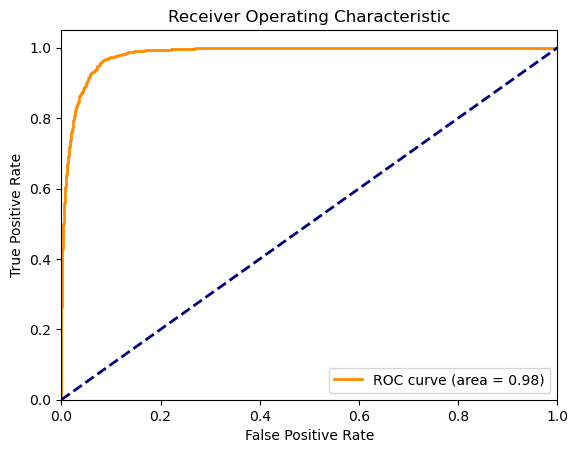

In [100]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### Gini Cofficient

In [213]:
print(f"Gini Cofficient{(area*2)-1}")

Gini Cofficient0.9659824153811534


Gini Coefficient	Model Quality
0.90 – 1.00	Excellent (rare in practice)
0.70 – 0.90	Strong / Very good model
0.50 – 0.70	Moderate / Acceptable
0.30 – 0.50	Weak (but may still be useful)
< 0.30	Poor / No discriminatory power

⚠️ Gini = 0 means model is no better than random.

## KS Stastiscs and Rank order

In [113]:
probablities=best_model_logistic.predict_proba(X_test_encoded)[:,1]
df_eval=pd.DataFrame({
    'Default Truth':y_test,
    'Default Probablities':probablities
})

In [114]:
df_eval.head()

,Default Truth,Default Probablities
33553,0,0.000006
9427,0,0.764494
199,0,0.141069
12447,0,0.421477
39489,0,0.000994


In [119]:
df_eval['decile']=pd.qcut(df_eval['Default Probablities'],q=10,labels=False,duplicates='drop')
df_eval

,Default Truth,Default Probablities,decile
33553,0,0.000006,1
9427,0,0.764494,8
199,0,0.141069,7
12447,0,0.421477,8
39489,0,0.000994,5
...,...,...,...
9771,0,0.000015,2
34737,0,0.000002,1
30390,0,0.000004,1
6797,0,0.000002,1


In [163]:
 df_grouped=df_eval.groupby('decile').apply(lambda x:pd.Series({
     'Minimum Probablity':x['Default Probablities'].min(),
     'Maximum Probablity':x['Default Probablities'].max(),
     'Events':x['Default Truth'].sum(),
     'Non Event':x['Default Truth'].count()-x['Default Truth'].sum()
 }))

df_grouped.reset_index(inplace=True)

C:\Users\ankit\AppData\Local\Temp\ipykernel_9772\1438152147.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grouped=df_eval.groupby('decile').apply(lambda x:pd.Series({


In [164]:
df_grouped

,decile,Minimum Probablity,Maximum Probablity,Events,Non Event
0,0,1.347125e-09,9.919531e-07,0.0,1250.0
1,1,9.921057e-07,7.416465e-06,0.0,1250.0
2,2,7.421661e-06,3.847582e-05,0.0,1250.0
3,3,3.862793e-05,1.966442e-04,0.0,1249.0
4,4,1.968529e-04,9.468504e-04,0.0,1250.0
5,5,9.485467e-04,5.361606e-03,1.0,1249.0
6,6,5.364942e-03,3.314706e-02,2.0,1247.0
7,7,3.318147e-02,2.104488e-01,17.0,1233.0
8,8,2.107060e-01,8.201628e-01,169.0,1081.0
9,9,8.204385e-01,9.999999e-01,919.0,331.0


In [165]:
df_grouped['Event_rate']=(df_grouped['Events']*100/(df_grouped['Events']+df_grouped['Non Event'])).round(2)
df_grouped['Non_Event_rate']=(df_grouped['Non Event']*100/(df_grouped['Events']+df_grouped['Non Event'])).round(2)
df_grouped                                                  

,decile,Minimum Probablity,Maximum Probablity,Events,Non Event,Event_rate,Non_Event_rate
0,0,1.347125e-09,9.919531e-07,0.0,1250.0,0.00,100.00
1,1,9.921057e-07,7.416465e-06,0.0,1250.0,0.00,100.00
2,2,7.421661e-06,3.847582e-05,0.0,1250.0,0.00,100.00
3,3,3.862793e-05,1.966442e-04,0.0,1249.0,0.00,100.00
4,4,1.968529e-04,9.468504e-04,0.0,1250.0,0.00,100.00
5,5,9.485467e-04,5.361606e-03,1.0,1249.0,0.08,99.92
6,6,5.364942e-03,3.314706e-02,2.0,1247.0,0.16,99.84
7,7,3.318147e-02,2.104488e-01,17.0,1233.0,1.36,98.64
8,8,2.107060e-01,8.201628e-01,169.0,1081.0,13.52,86.48
9,9,8.204385e-01,9.999999e-01,919.0,331.0,73.52,26.48


In [166]:
df_grouped.sort_values(by='decile',ascending=False,  inplace=True)

In [167]:
df_grouped

,decile,Minimum Probablity,Maximum Probablity,Events,Non Event,Event_rate,Non_Event_rate
9,9,8.204385e-01,9.999999e-01,919.0,331.0,73.52,26.48
8,8,2.107060e-01,8.201628e-01,169.0,1081.0,13.52,86.48
7,7,3.318147e-02,2.104488e-01,17.0,1233.0,1.36,98.64
6,6,5.364942e-03,3.314706e-02,2.0,1247.0,0.16,99.84
5,5,9.485467e-04,5.361606e-03,1.0,1249.0,0.08,99.92
4,4,1.968529e-04,9.468504e-04,0.0,1250.0,0.00,100.00
3,3,3.862793e-05,1.966442e-04,0.0,1249.0,0.00,100.00
2,2,7.421661e-06,3.847582e-05,0.0,1250.0,0.00,100.00
1,1,9.921057e-07,7.416465e-06,0.0,1250.0,0.00,100.00
0,0,1.347125e-09,9.919531e-07,0.0,1250.0,0.00,100.00


In [168]:
df_grouped['Event_cum']=df_grouped['Events'].cumsum()
df_grouped['Non_Event_cum']=df_grouped['Non Event'].cumsum()
df_grouped['Event_cum_rate']=df_grouped['Events'].cumsum()*100/df_grouped['Events'].sum()
df_grouped['Non_Event_cum_rate']=df_grouped['Non Event'].cumsum()*100/df_grouped['Non Event'].sum()
df_grouped

,decile,Minimum Probablity,Maximum Probablity,Events,Non Event,Event_rate,Non_Event_rate,Event_cum,Non_Event_cum,Event_cum_rate,Non_Event_cum_rate
9,9,8.204385e-01,9.999999e-01,919.0,331.0,73.52,26.48,919.0,331.0,82.942238,2.906058
8,8,2.107060e-01,8.201628e-01,169.0,1081.0,13.52,86.48,1088.0,1412.0,98.194946,12.396839
7,7,3.318147e-02,2.104488e-01,17.0,1233.0,1.36,98.64,1105.0,2645.0,99.729242,23.222125
6,6,5.364942e-03,3.314706e-02,2.0,1247.0,0.16,99.84,1107.0,3892.0,99.909747,34.170325
5,5,9.485467e-04,5.361606e-03,1.0,1249.0,0.08,99.92,1108.0,5141.0,100.000000,45.136084
4,4,1.968529e-04,9.468504e-04,0.0,1250.0,0.00,100.00,1108.0,6391.0,100.000000,56.110623
3,3,3.862793e-05,1.966442e-04,0.0,1249.0,0.00,100.00,1108.0,7640.0,100.000000,67.076383
2,2,7.421661e-06,3.847582e-05,0.0,1250.0,0.00,100.00,1108.0,8890.0,100.000000,78.050922
1,1,9.921057e-07,7.416465e-06,0.0,1250.0,0.00,100.00,1108.0,10140.0,100.000000,89.025461
0,0,1.347125e-09,9.919531e-07,0.0,1250.0,0.00,100.00,1108.0,11390.0,100.000000,100.000000


In [169]:
df_grouped['KS Stastiscs']=df_grouped['Event_cum_rate']-df_grouped['Non_Event_cum_rate']
df_grouped

,decile,Minimum Probablity,Maximum Probablity,Events,Non Event,Event_rate,Non_Event_rate,Event_cum,Non_Event_cum,Event_cum_rate,Non_Event_cum_rate,KS Stastiscs
9,9,8.204385e-01,9.999999e-01,919.0,331.0,73.52,26.48,919.0,331.0,82.942238,2.906058,80.036180
8,8,2.107060e-01,8.201628e-01,169.0,1081.0,13.52,86.48,1088.0,1412.0,98.194946,12.396839,85.798107
7,7,3.318147e-02,2.104488e-01,17.0,1233.0,1.36,98.64,1105.0,2645.0,99.729242,23.222125,76.507117
6,6,5.364942e-03,3.314706e-02,2.0,1247.0,0.16,99.84,1107.0,3892.0,99.909747,34.170325,65.739422
5,5,9.485467e-04,5.361606e-03,1.0,1249.0,0.08,99.92,1108.0,5141.0,100.000000,45.136084,54.863916
4,4,1.968529e-04,9.468504e-04,0.0,1250.0,0.00,100.00,1108.0,6391.0,100.000000,56.110623,43.889377
3,3,3.862793e-05,1.966442e-04,0.0,1249.0,0.00,100.00,1108.0,7640.0,100.000000,67.076383,32.923617
2,2,7.421661e-06,3.847582e-05,0.0,1250.0,0.00,100.00,1108.0,8890.0,100.000000,78.050922,21.949078
1,1,9.921057e-07,7.416465e-06,0.0,1250.0,0.00,100.00,1108.0,10140.0,100.000000,89.025461,10.974539
0,0,1.347125e-09,9.919531e-07,0.0,1250.0,0.00,100.00,1108.0,11390.0,100.000000,100.000000,0.000000


The maximum value of KSstatisc should be max in first 3 quartile and the value should be more than 40 percent.Greater the value of KS- Statics better is the seperation of the model between good and bad


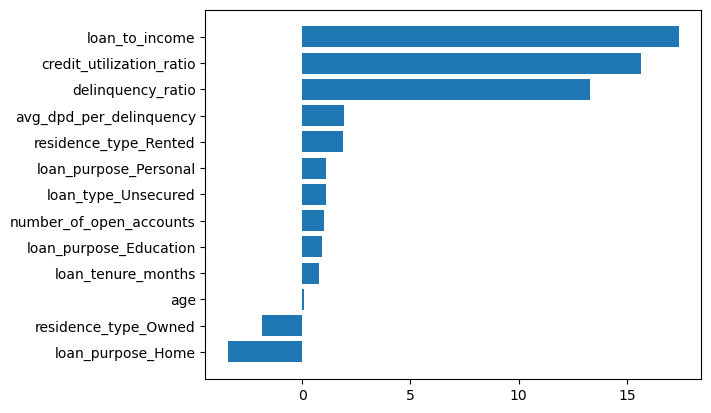

In [205]:
final_model=best_model_logistic
feature_importance=best_model_logistic.coef_[0]
coef_df=pd.DataFrame(feature_importance,index=X_train_encoded.columns,columns=['cofficients'])
coef_df.sort_values(by='cofficients',ascending=False,inplace=True)
plt.barh(y=coef_df.index[::-1],width=coef_df['cofficients'][::-1])
plt.show()

In [207]:
X_test_encoded.columns


Index(['credit_utilization_ratio', 'delinquency_ratio', 'loan_to_income',
       'avg_dpd_per_delinquency', 'loan_tenure_months', 'age',
       'number_of_open_accounts', 'loan_purpose_Education',
       'loan_purpose_Home', 'loan_purpose_Personal', 'residence_type_Owned',
       'residence_type_Rented', 'loan_type_Unsecured'],
      dtype='object')

In [208]:
columns_to_scale

Index(['age', 'number_of_dependants', 'years_at_current_address',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'avg_dpd_per_delinquency',
       'delinquency_ratio'],
      dtype='object')

In [210]:
X_train_encoded.columns

Index(['credit_utilization_ratio', 'delinquency_ratio', 'loan_to_income',
       'avg_dpd_per_delinquency', 'loan_tenure_months', 'age',
       'number_of_open_accounts', 'loan_purpose_Education',
       'loan_purpose_Home', 'loan_purpose_Personal', 'residence_type_Owned',
       'residence_type_Rented', 'loan_type_Unsecured'],
      dtype='object')

In [212]:
from joblib import dump
model_data={
    'model':final_model,
    'features':X_train_encoded.columns,
    'scalar':scalar,
    'cols_to_scale':columns_to_scale
}
dump(model_data,r"C:\Users\ankit\Python Project\NBFC Credit Risk assesment project\artifacts\model_data.joblib")

['C:\\Users\\ankit\\Python Project\\NBFC Credit Risk assesment project\\artifacts\\model_data.joblib']

In [215]:
final_model.coef_,final_model.intercept_

(array([[15.65208537, 13.28634104, 17.40602799,  1.92194103,  0.7730633 ,
          0.09848438,  1.01989295,  0.92812   , -3.42363072,  1.10966314,
         -1.84231286,  1.86558863,  1.10966314]]),
 array([-20.52914452]))